In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
%matplotlib inline

In [2]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content  

In [3]:
train['source'] = 'train'
test['source'] = 'test'
test['Item_Outlet_Sales'] = 0
data = pd.concat([train,test],sort=False)

In [4]:
data.shape

(14204, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 13 columns):
Item_Identifier              14204 non-null object
Item_Weight                  11765 non-null float64
Item_Fat_Content             14204 non-null object
Item_Visibility              14204 non-null float64
Item_Type                    14204 non-null object
Item_MRP                     14204 non-null float64
Outlet_Identifier            14204 non-null object
Outlet_Establishment_Year    14204 non-null int64
Outlet_Size                  10188 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Type                  14204 non-null object
Item_Outlet_Sales            14204 non-null float64
source                       14204 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 1.5+ MB


In [6]:
data['Item_Outlet_Sales'].describe()

count    14204.000000
mean      1308.865489
std       1699.791423
min          0.000000
25%          0.000000
50%        559.272000
75%       2163.184200
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

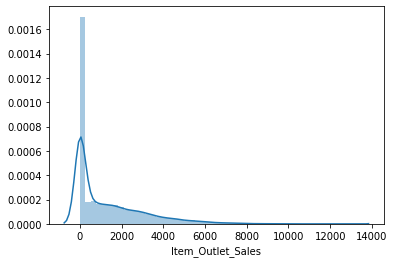

In [7]:
import seaborn as sns
sns.distplot(data['Item_Outlet_Sales'])
plt.show()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 13 columns):
Item_Identifier              14204 non-null object
Item_Weight                  11765 non-null float64
Item_Fat_Content             14204 non-null object
Item_Visibility              14204 non-null float64
Item_Type                    14204 non-null object
Item_MRP                     14204 non-null float64
Outlet_Identifier            14204 non-null object
Outlet_Establishment_Year    14204 non-null int64
Outlet_Size                  10188 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Type                  14204 non-null object
Item_Outlet_Sales            14204 non-null float64
source                       14204 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 1.5+ MB


In [9]:
cat_var = data.select_dtypes(include =[np.object])
cat_var.shape

(14204, 8)

In [10]:
num_var = data.select_dtypes(include=[np.float64])
num_var.shape

(14204, 4)

In [11]:
cat_var.isnull().sum()

Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             4016
Outlet_Location_Type       0
Outlet_Type                0
source                     0
dtype: int64

In [12]:
num_var.isnull().sum()

Item_Weight          2439
Item_Visibility         0
Item_MRP                0
Item_Outlet_Sales       0
dtype: int64

MISSING VALUES HANDLING 

In [13]:
data.apply(lambda x : len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

In [14]:
cat_var.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 8 columns):
Item_Identifier         14204 non-null object
Item_Fat_Content        14204 non-null object
Item_Type               14204 non-null object
Outlet_Identifier       14204 non-null object
Outlet_Size             10188 non-null object
Outlet_Location_Type    14204 non-null object
Outlet_Type             14204 non-null object
source                  14204 non-null object
dtypes: object(8)
memory usage: 998.7+ KB


In [15]:
for var in cat_var:
    data[var].fillna(method='ffill',inplace=True)

In [16]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

In [17]:
for var in num_var:
    mean = np.around(np.mean(data[var]))
    data[var].fillna(mean,inplace = True)

In [18]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
source                       0
dtype: int64

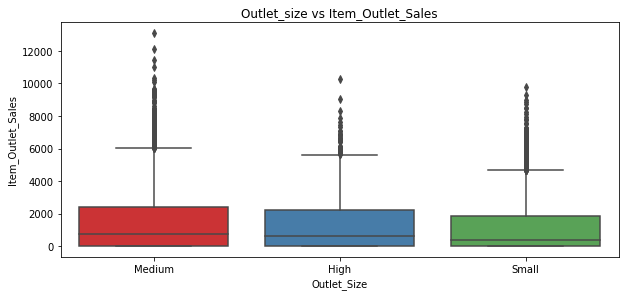

In [19]:
import seaborn as sns 
plt.figure(figsize =(10,9))
plt.subplot(311)

ax = sns.boxplot(x = 'Outlet_Size',y = 'Item_Outlet_Sales',data=data ,palette="Set1")
ax.set_title("Outlet_size vs Item_Outlet_Sales")
plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)

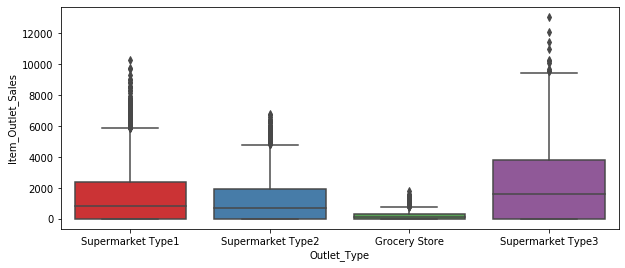

In [20]:
plt.figure(figsize=(10,9))
plt.subplot(212)

ax = sns.boxplot(x ='Outlet_Type' ,y='Item_Outlet_Sales',data=data,palette="Set1" )

In [21]:
data['Outlet_Size'].isnull().sum()

0

In [22]:
#Determine average visibility of a product
visibility_avg = data.pivot_table(values='Item_Visibility', index='Item_Identifier')

#Impute 0 values with mean visibility of that product:
missing_values = (data['Item_Visibility'] == 0)

print ('Number of 0 values initially: %d'%sum(missing_values))
data.loc[missing_values,'Item_Visibility'] = data.loc[missing_values,'Item_Identifier'].apply(lambda x: visibility_avg.at[x, 'Item_Visibility'])
print ('Number of 0 values after modification: %d'%sum(data['Item_Visibility'] == 0))

Number of 0 values initially: 879
Number of 0 values after modification: 0


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 13 columns):
Item_Identifier              14204 non-null object
Item_Weight                  14204 non-null float64
Item_Fat_Content             14204 non-null object
Item_Visibility              14204 non-null float64
Item_Type                    14204 non-null object
Item_MRP                     14204 non-null float64
Outlet_Identifier            14204 non-null object
Outlet_Establishment_Year    14204 non-null int64
Outlet_Size                  14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Type                  14204 non-null object
Item_Outlet_Sales            14204 non-null float64
source                       14204 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 1.8+ MB


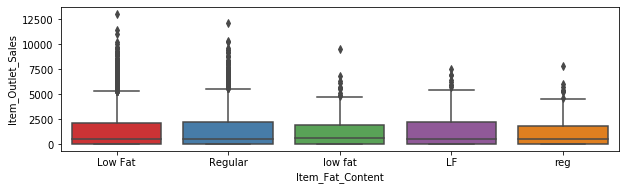

In [24]:
plt.figure(figsize = (10,9))

plt.subplot(311)
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=data, palette="Set1")

In [25]:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x:x[0:2])
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'food','NC':'Non_consum','DR':'Drink'})
data['Item_Type_Combined'].value_counts()

food          10201
Non_consum     2686
Drink          1317
Name: Item_Type_Combined, dtype: int64

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 14 columns):
Item_Identifier              14204 non-null object
Item_Weight                  14204 non-null float64
Item_Fat_Content             14204 non-null object
Item_Visibility              14204 non-null float64
Item_Type                    14204 non-null object
Item_MRP                     14204 non-null float64
Outlet_Identifier            14204 non-null object
Outlet_Establishment_Year    14204 non-null int64
Outlet_Size                  14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Type                  14204 non-null object
Item_Outlet_Sales            14204 non-null float64
source                       14204 non-null object
Item_Type_Combined           14204 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 1.9+ MB


In [27]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

In [28]:
data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [29]:
data['Item_MRP'].describe()

count    14204.000000
mean       141.004977
std         62.086938
min         31.290000
25%         94.012000
50%        142.247000
75%        185.855600
max        266.888400
Name: Item_MRP, dtype: float64

In [30]:
data['Outlet_Establishment_Year'].describe()

count    14204.000000
mean      1997.830681
std          8.371664
min       1985.000000
25%       1987.000000
50%       1999.000000
75%       2004.000000
max       2009.000000
Name: Outlet_Establishment_Year, dtype: float64

In [31]:
data['Outlet_Year'] = 2019 - data['Outlet_Establishment_Year']
data['Outlet_Year'].describe()

count    14204.000000
mean        21.169319
std          8.371664
min         10.000000
25%         15.000000
50%         20.000000
75%         32.000000
max         34.000000
Name: Outlet_Year, dtype: float64

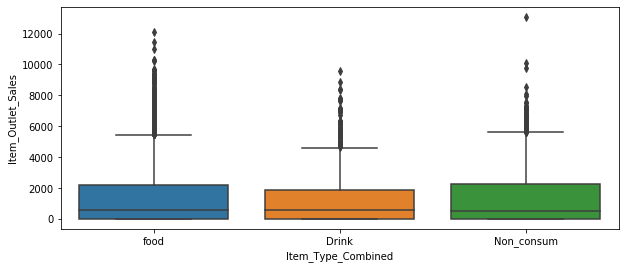

In [32]:
plt.figure(figsize=(10,9))

plt.subplot(211)
sns.boxplot(x = 'Item_Type_Combined',y = 'Item_Outlet_Sales',data = data)

In [33]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()

data['Outlet'] = encode.fit_transform(data['Outlet_Identifier'])

var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
for i in var_mod:
    data[i] = encode.fit_transform(data[i])

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 16 columns):
Item_Identifier              14204 non-null object
Item_Weight                  14204 non-null float64
Item_Fat_Content             14204 non-null int64
Item_Visibility              14204 non-null float64
Item_Type                    14204 non-null object
Item_MRP                     14204 non-null float64
Outlet_Identifier            14204 non-null object
Outlet_Establishment_Year    14204 non-null int64
Outlet_Size                  14204 non-null int64
Outlet_Location_Type         14204 non-null int64
Outlet_Type                  14204 non-null int64
Item_Outlet_Sales            14204 non-null float64
source                       14204 non-null object
Item_Type_Combined           14204 non-null int64
Outlet_Year                  14204 non-null int64
Outlet                       14204 non-null int64
dtypes: float64(4), int64(8), object(4)
memory usage: 2.2+ MB


In [35]:
data = pd.get_dummies(data ,columns=var_mod)

In [36]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Outlet_Year                    int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Outlet_0                       uint8
Outlet_1                       uint8
O

In [37]:
#remove un wanted columns 
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace =True)

In [38]:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

In [39]:
train.shape

(8523, 33)

In [40]:
test.shape

(5681, 33)

In [ ]:
test.drop(['Item_Outlet_Sales'],axis=1,inplace=True)

In [42]:
train.drop(['source'],axis =1,inplace=True)

In [44]:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)